# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 미용실

In [11]:
# 미용실만 남기기
ap_hair = df_ap_quarter[df_ap_quarter.업종명 == '미용실'].reset_index().drop('index', axis=1)
ap_hair

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,서비스,미용,미용실,압구정동,18276187910,237,9,3
1,2017-2,서비스,미용,미용실,압구정동,19037816065,245,9,1
2,2017-3,서비스,미용,미용실,압구정동,19012316355,243,11,13
3,2017-4,서비스,미용,미용실,압구정동,17220189936,241,7,9
4,2018-1,서비스,미용,미용실,압구정동,16666453915,241,8,8
5,2018-2,서비스,미용,미용실,압구정동,17443781121,239,5,7
6,2018-3,서비스,미용,미용실,압구정동,17394487139,236,9,12
7,2018-4,서비스,미용,미용실,압구정동,18117631506,237,3,2
8,2019-1,서비스,미용,미용실,압구정동,16467800645,233,11,10
9,2019-2,서비스,미용,미용실,압구정동,17090121970,236,7,4


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [12]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_hair['성장성'] = ap_hair['분기당_매출_금액'] / ap_hair['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_hair['성장성'][0] = 1

ap_hair

<ipython-input-12-a284ae01d244>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_hair['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,서비스,미용,미용실,압구정동,18276187910,237,9,3,1.000000
1,2017-2,서비스,미용,미용실,압구정동,19037816065,245,9,1,1.041673
2,2017-3,서비스,미용,미용실,압구정동,19012316355,243,11,13,0.998661
3,2017-4,서비스,미용,미용실,압구정동,17220189936,241,7,9,0.905739
4,2018-1,서비스,미용,미용실,압구정동,16666453915,241,8,8,0.967844
5,2018-2,서비스,미용,미용실,압구정동,17443781121,239,5,7,1.046640
6,2018-3,서비스,미용,미용실,압구정동,17394487139,236,9,12,0.997174
7,2018-4,서비스,미용,미용실,압구정동,18117631506,237,3,2,1.041573
8,2019-1,서비스,미용,미용실,압구정동,16467800645,233,11,10,0.908938
9,2019-2,서비스,미용,미용실,압구정동,17090121970,236,7,4,1.037790


In [13]:
# 개업률, 폐업률, 순점포증감률 추가

ap_hair['개업률'] = (ap_hair['개업점포수'] / ap_hair['총 점포수']) * 100
ap_hair['폐업률'] = (ap_hair['폐업점포수'] / ap_hair['총 점포수']) * 100
ap_hair['순점포증감률'] = ((ap_hair['개업점포수'] - ap_hair['폐업점포수']) / ap_hair['총 점포수']) * 100

ap_hair

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,서비스,미용,미용실,압구정동,18276187910,237,9,3,1.000000,3.797468,1.265823,2.531646
1,2017-2,서비스,미용,미용실,압구정동,19037816065,245,9,1,1.041673,3.673469,0.408163,3.265306
2,2017-3,서비스,미용,미용실,압구정동,19012316355,243,11,13,0.998661,4.526749,5.349794,-0.823045
3,2017-4,서비스,미용,미용실,압구정동,17220189936,241,7,9,0.905739,2.904564,3.734440,-0.829876
4,2018-1,서비스,미용,미용실,압구정동,16666453915,241,8,8,0.967844,3.319502,3.319502,0.000000
5,2018-2,서비스,미용,미용실,압구정동,17443781121,239,5,7,1.046640,2.092050,2.928870,-0.836820
6,2018-3,서비스,미용,미용실,압구정동,17394487139,236,9,12,0.997174,3.813559,5.084746,-1.271186
7,2018-4,서비스,미용,미용실,압구정동,18117631506,237,3,2,1.041573,1.265823,0.843882,0.421941
8,2019-1,서비스,미용,미용실,압구정동,16467800645,233,11,10,0.908938,4.721030,4.291845,0.429185
9,2019-2,서비스,미용,미용실,압구정동,17090121970,236,7,4,1.037790,2.966102,1.694915,1.271186


In [14]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 미용실만 남기기
gangnam_hair = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '미용실'].reset_index()

################################################################################################################################################################################################

ap_hair['시장성'] = (ap_hair['분기당_매출_금액'] / ap_hair['총 점포수']) - (gangnam_hair['분기당_매출_금액'] / gangnam_hair['총 점포수'])

ap_hair = ap_hair[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,18276187910,1.000000,2.531646,2.900864e+07
1,2017-2,미용실,19037816065,1.041673,3.265306,2.810842e+07
2,2017-3,미용실,19012316355,0.998661,-0.823045,2.791689e+07
3,2017-4,미용실,17220189936,0.905739,-0.829876,2.550818e+07
4,2018-1,미용실,16666453915,0.967844,0.000000,2.239508e+07
5,2018-2,미용실,17443781121,1.046640,-0.836820,2.530424e+07
6,2018-3,미용실,17394487139,0.997174,-1.271186,2.724746e+07
7,2018-4,미용실,18117631506,1.041573,0.421941,3.133395e+07
8,2019-1,미용실,16467800645,0.908938,0.429185,2.925505e+07
9,2019-2,미용실,17090121970,1.037790,1.271186,3.239644e+07


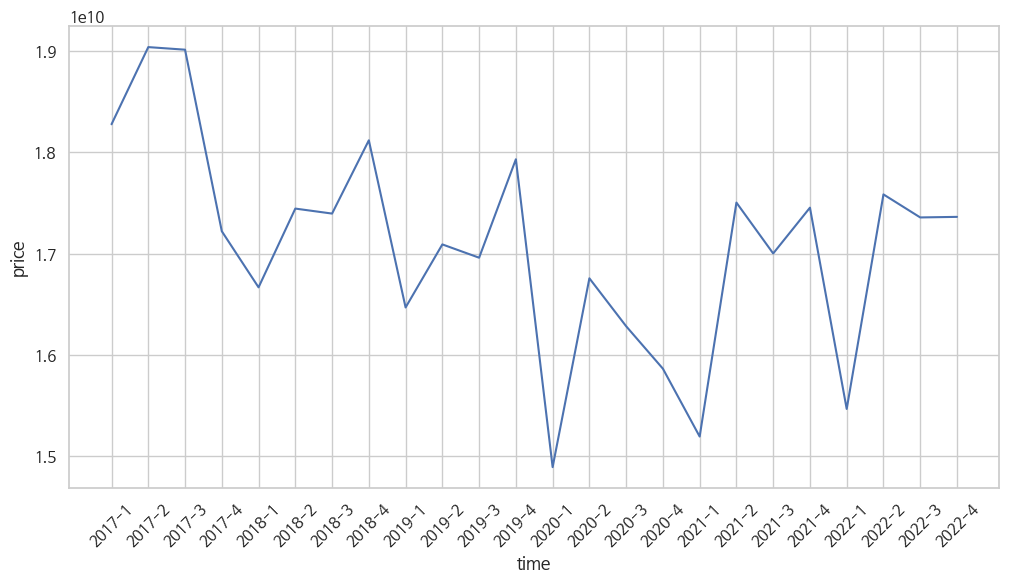

In [15]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_hair['분기'], y=ap_hair['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [16]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_hair[['성장성', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  2.900864e+07  2.531646
1   1.041673  2.810842e+07  3.265306
2   0.998661  2.791689e+07 -0.823045
3   0.905739  2.550818e+07 -0.829876
4   0.967844  2.239508e+07  0.000000
5   1.046640  2.530424e+07 -0.836820
6   0.997174  2.724746e+07 -1.271186
7   1.041573  3.133395e+07  0.421941
8   0.908938  2.925505e+07  0.429185
9   1.037790  3.239644e+07  1.271186
10  0.992324  3.046200e+07 -0.425532
11  1.057294  3.615947e+07 -2.575107
12  0.830529  2.793465e+07 -0.431034
13  1.125151  3.151966e+07 -1.298701
14  0.971764  3.058536e+07  1.702128
15  0.974256  3.051410e+07  0.843882
16  0.957779  2.548676e+07  4.819277
17  1.152003  3.019326e+07  1.195219
18  0.971309  2.827732e+07  1.185771
19  1.026588  2.963493e+07  1.190476
20  0.886152  2.482405e+07  1.562500
21  1.136941  2.872793e+07  1.171875
22  0.987070  2.857358e+07 -1.587302
23  1.000322  2.810921e+07  0.781250
---------------------------------------------------------------------------

In [17]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [18]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [19]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [20]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.48694709 0.44887576 0.13358863]
 [0.52816974 0.41513869 0.45390625]]


In [21]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [22]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [23]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4347
Epoch 1: val_loss improved from inf to 0.19749, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.4347 - val_loss: 0.1975
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4332
Epoch 2: val_loss improved from 0.19749 to 0.19653, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.4332 - val_loss: 0.1965
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4318
Epoch 3: val_loss improved from 0.19653 to 0.19557, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.4318 - val_loss: 0.1956
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4303
Epoch 4: val_loss improved from 0.19557 to 0.19462, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.4303 - val_loss: 0.1946
Epoch 5/300
1/1 [=================

In [24]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 957ms/step
[[0.35701942]
 [0.35110322]
 [0.33507285]
 [0.388396  ]]


In [25]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.138450,0.357019
2022-2,0.649289,0.351103
2022-3,0.594449,0.335073
2022-4,0.595797,0.388396


In [26]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.138450,0.357019,15465876592,1.637205e+10,-9.061774e+08
2022-2,0.649289,0.351103,17583788566,1.634753e+10,1.236262e+09
2022-3,0.594449,0.335073,17356426000,1.628107e+10,1.075361e+09
2022-4,0.595797,0.388396,17362010956,1.650214e+10,8.598711e+08


In [27]:
df_test = df_test.reset_index()

### 결과

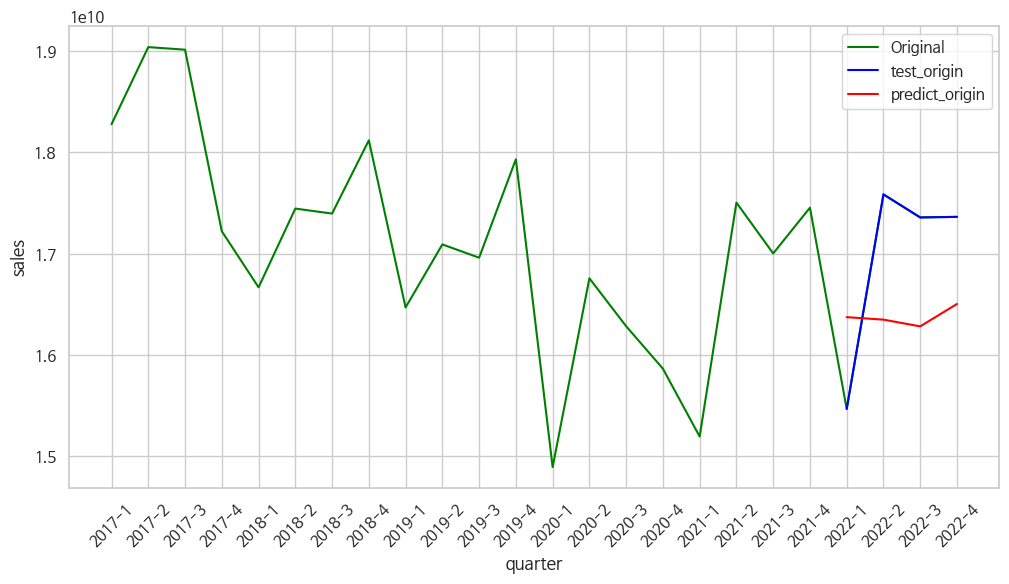

In [28]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [29]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.663291e+08
std      9.937079e+08
min     -9.061774e+08
25%      4.183589e+08
50%      9.676158e+08
75%      1.115586e+09
max      1.236262e+09
dtype: float64

In [30]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 30ms/step
[[0.30774182]]
--------------------------------------------------------------------------------
예측된 매출  : 16167751680.0 


## 23년 1분기 성장성 예측

In [31]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      분기당_매출_금액           시장성    순점포증감률
0   18276187910  2.900864e+07  2.531646
1   19037816065  2.810842e+07  3.265306
2   19012316355  2.791689e+07 -0.823045
3   17220189936  2.550818e+07 -0.829876
4   16666453915  2.239508e+07  0.000000
5   17443781121  2.530424e+07 -0.836820
6   17394487139  2.724746e+07 -1.271186
7   18117631506  3.133395e+07  0.421941
8   16467800645  2.925505e+07  0.429185
9   17090121970  3.239644e+07  1.271186
10  16958942322  3.046200e+07 -0.425532
11  17930588551  3.615947e+07 -2.575107
12  14891871509  2.793465e+07 -0.431034
13  16755601189  3.151966e+07 -1.298701
14  16282489285  3.058536e+07  1.702128
15  15863305785  3.051410e+07  0.843882
16  15193540927  2.548676e+07  4.819277
17  17503004727  3.019326e+07  1.195219
18  17000828593  2.827732e+07  1.185771
19  17452844444  2.963493e+07  1.190476
20  15465876592  2.482405e+07  1.562500
21  17583788566  2.872793e+07  1.171875
22  17356426000  2.857358e+07 -1.587302
23  17362010956  2.810921e+07  0.781250


In [32]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [33]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [34]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.59444946 0.44887576 0.13358863]
 [0.59579655 0.41513869 0.45390625]]


In [35]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [36]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3146
Epoch 1: val_loss improved from inf to 0.39961, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3146 - val_loss: 0.3996
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3134
Epoch 2: val_loss improved from 0.39961 to 0.39838, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.3134 - val_loss: 0.3984
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3121
Epoch 3: val_loss improved from 0.39838 to 0.39715, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3121 - val_loss: 0.3972
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3108
Epoch 4: val_loss improved from 0.39715 to 0.39593, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3108 - val_loss: 0.3959
Epoch 5/300
1/1 [=================

In [38]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 643ms/step
[[0.4768617 ]
 [0.4559408 ]
 [0.39968255]
 [0.4707956 ]]


In [39]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.173026,0.476862
2022-2,0.953147,0.455941
2022-3,0.486947,0.399683
2022-4,0.528170,0.470796


In [40]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 3].values       # 성장성이 ap_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.173026,0.476862,0.886152,0.983828,-0.097675
2022-2,0.953147,0.455941,1.136941,0.977102,0.159839
2022-3,0.486947,0.399683,0.987070,0.959017,0.028053
2022-4,0.528170,0.470796,1.000322,0.981877,0.018444


### 결과

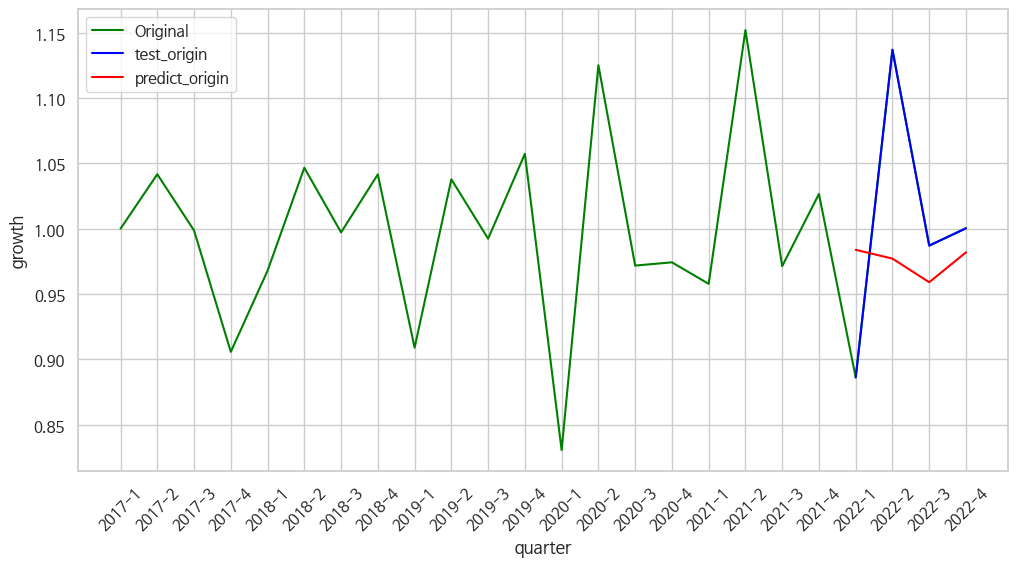

In [41]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [42]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.027165
std      0.105300
min     -0.097675
25%     -0.010586
50%      0.023249
75%      0.061000
max      0.159839
dtype: float64

In [43]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 21ms/step
[[0.42763025]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9680009484291077 


## 23년 1분기 시장성 예측

In [44]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_hair[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액    순점포증감률
0   1.000000  18276187910  2.531646
1   1.041673  19037816065  3.265306
2   0.998661  19012316355 -0.823045
3   0.905739  17220189936 -0.829876
4   0.967844  16666453915  0.000000
5   1.046640  17443781121 -0.836820
6   0.997174  17394487139 -1.271186
7   1.041573  18117631506  0.421941
8   0.908938  16467800645  0.429185
9   1.037790  17090121970  1.271186
10  0.992324  16958942322 -0.425532
11  1.057294  17930588551 -2.575107
12  0.830529  14891871509 -0.431034
13  1.125151  16755601189 -1.298701
14  0.971764  16282489285  1.702128
15  0.974256  15863305785  0.843882
16  0.957779  15193540927  4.819277
17  1.152003  17503004727  1.195219
18  0.971309  17000828593  1.185771
19  1.026588  17452844444  1.190476
20  0.886152  15465876592  1.562500
21  1.136941  17583788566  1.171875
22  0.987070  17356426000 -1.587302
23  1.000322  17362010956  0.781250
--------------------------------------------------------------------------------
             시장성
0 

In [45]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [46]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [47]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.48694709 0.59444946 0.13358863]
 [0.52816974 0.59579655 0.45390625]]


In [48]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [49]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3234
Epoch 1: val_loss improved from inf to 0.28880, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3234 - val_loss: 0.2888
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3221
Epoch 2: val_loss improved from 0.28880 to 0.28762, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.3221 - val_loss: 0.2876
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3209
Epoch 3: val_loss improved from 0.28762 to 0.28645, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.3209 - val_loss: 0.2865
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3196
Epoch 4: val_loss improved from 0.28645 to 0.28529, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.3196 - val_loss: 0.2853
Epoch 5/300
1/1 [==============

In [51]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 864ms/step
[[0.44657752]
 [0.4347579 ]
 [0.40590987]
 [0.5052972 ]]


In [52]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.176468,0.446578
2022-2,0.460090,0.434758
2022-3,0.448876,0.405910
2022-4,0.415139,0.505297


In [53]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 5].values       # 시장성이 ap_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.176468,0.446578,2.482405e+07,28541950.0,-3.717895e+06
2022-2,0.460090,0.434758,2.872793e+07,28379260.0,3.486739e+05
2022-3,0.448876,0.405910,2.857358e+07,27982186.0,5.913975e+05
2022-4,0.415139,0.505297,2.810921e+07,29350190.0,-1.240977e+06


### 결과

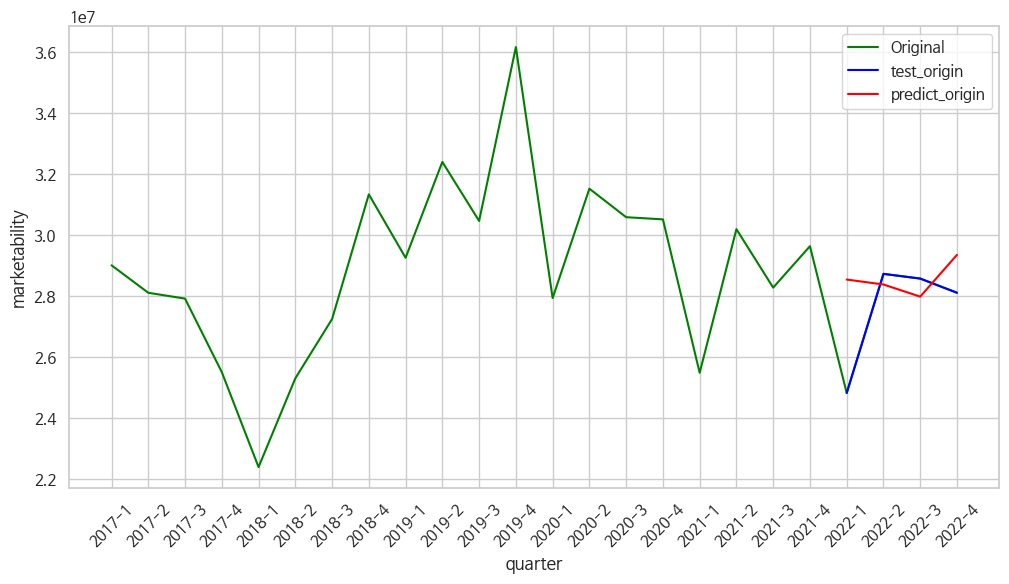

In [54]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [55]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.004700e+06
std      1.982961e+06
min     -3.717895e+06
25%     -1.860206e+06
50%     -4.461515e+05
75%      4.093548e+05
max      5.913975e+05
dtype: float64

In [56]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 28ms/step
[[0.39973235]]
--------------------------------------------------------------------------------
예측된 시장성  : 27897154.0 


## 23년 1분기 순점포증감률 예측

In [57]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_hair[['성장성', '분기당_매출_금액', '시장성']]
y = ap_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액           시장성
0   1.000000  18276187910  2.900864e+07
1   1.041673  19037816065  2.810842e+07
2   0.998661  19012316355  2.791689e+07
3   0.905739  17220189936  2.550818e+07
4   0.967844  16666453915  2.239508e+07
5   1.046640  17443781121  2.530424e+07
6   0.997174  17394487139  2.724746e+07
7   1.041573  18117631506  3.133395e+07
8   0.908938  16467800645  2.925505e+07
9   1.037790  17090121970  3.239644e+07
10  0.992324  16958942322  3.046200e+07
11  1.057294  17930588551  3.615947e+07
12  0.830529  14891871509  2.793465e+07
13  1.125151  16755601189  3.151966e+07
14  0.971764  16282489285  3.058536e+07
15  0.974256  15863305785  3.051410e+07
16  0.957779  15193540927  2.548676e+07
17  1.152003  17503004727  3.019326e+07
18  0.971309  17000828593  2.827732e+07
19  1.026588  17452844444  2.963493e+07
20  0.886152  15465876592  2.482405e+07
21  1.136941  17583788566  2.872793e+07
22  0.987070  17356426000  2.857358e+07
23  1.000322  17362010956  2.810921e+07


In [58]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [59]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [60]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.48694709 0.59444946 0.44887576]
 [0.52816974 0.59579655 0.41513869]]


In [61]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [62]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1212
Epoch 1: val_loss improved from inf to 0.32734, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1212 - val_loss: 0.3273
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1204
Epoch 2: val_loss improved from 0.32734 to 0.32612, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.1204 - val_loss: 0.3261
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1196
Epoch 3: val_loss improved from 0.32612 to 0.32490, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.1196 - val_loss: 0.3249
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1188
Epoch 4: val_loss improved from 0.32490 to 0.32369, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1188 - val_loss: 0.3237
Epoch 5/300
1/1 [=================

In [64]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 665ms/step
[[0.27421674]
 [0.25603485]
 [0.22267416]
 [0.31617135]]


In [65]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.559561,0.274217
2022-2,0.506734,0.256035
2022-3,0.133589,0.222674
2022-4,0.453906,0.316171


In [66]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.559561,0.274217,1.562500,-0.547443,2.109943
2022-2,0.506734,0.256035,1.171875,-0.681887,1.853762
2022-3,0.133589,0.222674,-1.587302,-0.928569,-0.658733
2022-4,0.453906,0.316171,0.781250,-0.237215,1.018465


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


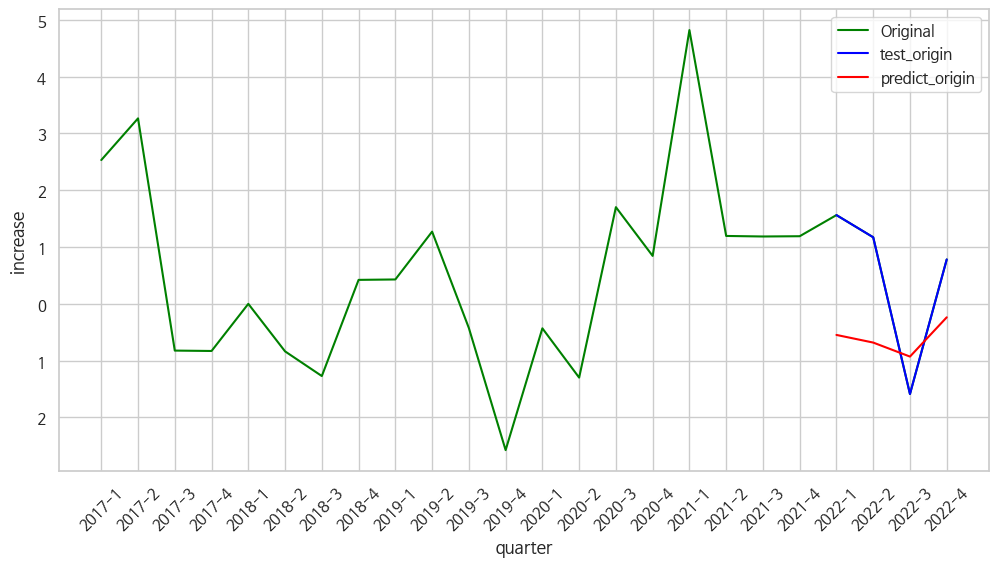

In [67]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [68]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.080859
std      1.249862
min     -0.658733
25%      0.599165
50%      1.436113
75%      1.917807
max      2.109943
dtype: float64

In [69]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.27721867]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.5252458453178406 


## 원본 데이터에 예측값 추가하기

In [70]:
print(sales)
print(growth)
print(marketability)
print(increase)

16167752000.0
0.96800095
27897154.0
-0.52524585


In [71]:
ap_hair.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-71-c03784f102a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_hair.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [72]:
ap_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,1.827619e+10,1.000000,2.531646,2.900864e+07
1,2017-2,미용실,1.903782e+10,1.041673,3.265306,2.810842e+07
2,2017-3,미용실,1.901232e+10,0.998661,-0.823045,2.791689e+07
3,2017-4,미용실,1.722019e+10,0.905739,-0.829876,2.550818e+07
4,2018-1,미용실,1.666645e+10,0.967844,0.000000,2.239508e+07
5,2018-2,미용실,1.744378e+10,1.046640,-0.836820,2.530424e+07
6,2018-3,미용실,1.739449e+10,0.997174,-1.271186,2.724746e+07
7,2018-4,미용실,1.811763e+10,1.041573,0.421941,3.133395e+07
8,2019-1,미용실,1.646780e+10,0.908938,0.429185,2.925505e+07
9,2019-2,미용실,1.709012e+10,1.037790,1.271186,3.239644e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [73]:
### X / y 데이터 생성
X = ap_hair[['성장성', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  2.900864e+07  2.531646
1   1.041673  2.810842e+07  3.265306
2   0.998661  2.791689e+07 -0.823045
3   0.905739  2.550818e+07 -0.829876
4   0.967844  2.239508e+07  0.000000
5   1.046640  2.530424e+07 -0.836820
6   0.997174  2.724746e+07 -1.271186
7   1.041573  3.133395e+07  0.421941
8   0.908938  2.925505e+07  0.429185
9   1.037790  3.239644e+07  1.271186
10  0.992324  3.046200e+07 -0.425532
11  1.057294  3.615947e+07 -2.575107
12  0.830529  2.793465e+07 -0.431034
13  1.125151  3.151966e+07 -1.298701
14  0.971764  3.058536e+07  1.702128
15  0.974256  3.051410e+07  0.843882
16  0.957779  2.548676e+07  4.819277
17  1.152003  3.019326e+07  1.195219
18  0.971309  2.827732e+07  1.185771
19  1.026588  2.963493e+07  1.190476
20  0.886152  2.482405e+07  1.562500
21  1.136941  2.872793e+07  1.171875
22  0.987070  2.857358e+07 -1.587302
23  1.000322  2.810921e+07  0.781250
24  0.968001  2.789715e+07 -0.525246
--------------------------------------

In [74]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [75]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.52816974 0.41513869 0.45390625]
 [0.42763029 0.39973233 0.27721868]]


In [76]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [77]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [78]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3953
Epoch 1: val_loss improved from inf to 0.20073, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3953 - val_loss: 0.2007
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3940
Epoch 2: val_loss improved from 0.20073 to 0.19973, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.3940 - val_loss: 0.1997
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3926
Epoch 3: val_loss improved from 0.19973 to 0.19873, saving model to stock_model.h5
1/1 [==============================] - 0s 121ms/step - loss: 0.3926 - val_loss: 0.1987
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3913
Epoch 4: val_loss improved from 0.19873 to 0.19774, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.3913 - val_loss: 0.1977
Epoch 5/300
1/1 [===============

In [79]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 839ms/step
[[0.36292252]
 [0.34626758]
 [0.40134043]
 [0.31683394]]


In [80]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.649289,0.362923
2022-3,0.594449,0.346268
2022-4,0.595797,0.401340
2023-1,0.307742,0.316834


In [81]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.649289,0.362923,1.758379e+10,1.639653e+10,1.187260e+09
2022-3,0.594449,0.346268,1.735643e+10,1.632748e+10,1.028948e+09
2022-4,0.595797,0.401340,1.736201e+10,1.655581e+10,8.062042e+08
2023-1,0.307742,0.316834,1.616775e+10,1.620545e+10,-3.769549e+07


In [82]:
df_test = df_test.reset_index()

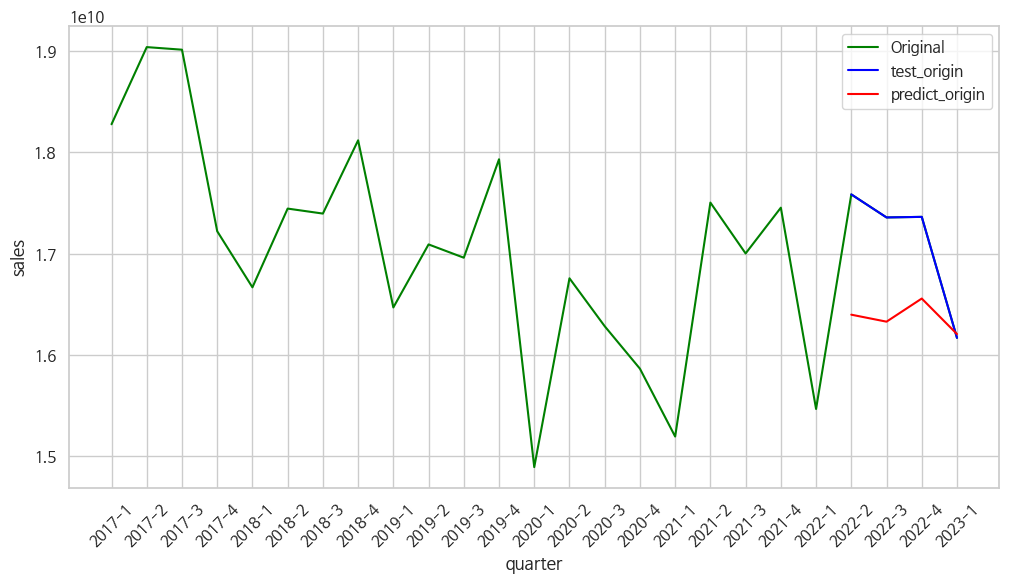

In [83]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [84]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     7.461791e+08
std      5.454578e+08
min     -3.769549e+07
25%      5.952293e+08
50%      9.175760e+08
75%      1.068526e+09
max      1.187260e+09
dtype: float64

In [85]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.34241152]]
--------------------------------------------------------------------------------
예측된 매출  : 16311490560.0 


### 성장성

In [86]:
### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.827619e+10  2.900864e+07  2.531646
1   1.903782e+10  2.810842e+07  3.265306
2   1.901232e+10  2.791689e+07 -0.823045
3   1.722019e+10  2.550818e+07 -0.829876
4   1.666645e+10  2.239508e+07  0.000000
5   1.744378e+10  2.530424e+07 -0.836820
6   1.739449e+10  2.724746e+07 -1.271186
7   1.811763e+10  3.133395e+07  0.421941
8   1.646780e+10  2.925505e+07  0.429185
9   1.709012e+10  3.239644e+07  1.271186
10  1.695894e+10  3.046200e+07 -0.425532
11  1.793059e+10  3.615947e+07 -2.575107
12  1.489187e+10  2.793465e+07 -0.431034
13  1.675560e+10  3.151966e+07 -1.298701
14  1.628249e+10  3.058536e+07  1.702128
15  1.586331e+10  3.051410e+07  0.843882
16  1.519354e+10  2.548676e+07  4.819277
17  1.750300e+10  3.019326e+07  1.195219
18  1.700083e+10  2.827732e+07  1.185771
19  1.745284e+10  2.963493e+07  1.190476
20  1.546588e+10  2.482405e+07  1.562500
21  1.758379e+10  2.872793e+07  1.171875
22  1.735643e+10  2.857358e+07 -1.587302
23  1.736201e+10

In [87]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [88]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.59579655 0.41513869 0.45390625]
 [0.30774174 0.39973233 0.27721868]]


In [89]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [90]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [91]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2861
Epoch 1: val_loss improved from inf to 0.40444, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2861 - val_loss: 0.4044
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2850
Epoch 2: val_loss improved from 0.40444 to 0.40315, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2850 - val_loss: 0.4032
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2838
Epoch 3: val_loss improved from 0.40315 to 0.40188, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2838 - val_loss: 0.4019
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2827
Epoch 4: val_loss improved from 0.40188 to 0.40061, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2827 - val_loss: 0.4006
Epoch 5/300
1/1 [=================

In [92]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 651ms/step
[[0.42395198]
 [0.37448516]
 [0.43552598]
 [0.39523315]]


In [93]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.953147,0.423952
2022-3,0.486947,0.374485
2022-4,0.528170,0.435526
2023-1,0.427630,0.395233


In [94]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 3].values       # 성장성이 ap_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.953147,0.423952,1.136941,0.966818,0.170123
2022-3,0.486947,0.374485,0.987070,0.950916,0.036154
2022-4,0.528170,0.435526,1.000322,0.970539,0.029783
2023-1,0.427630,0.395233,0.968001,0.957586,0.010415


In [95]:
df_test = df_test.reset_index()

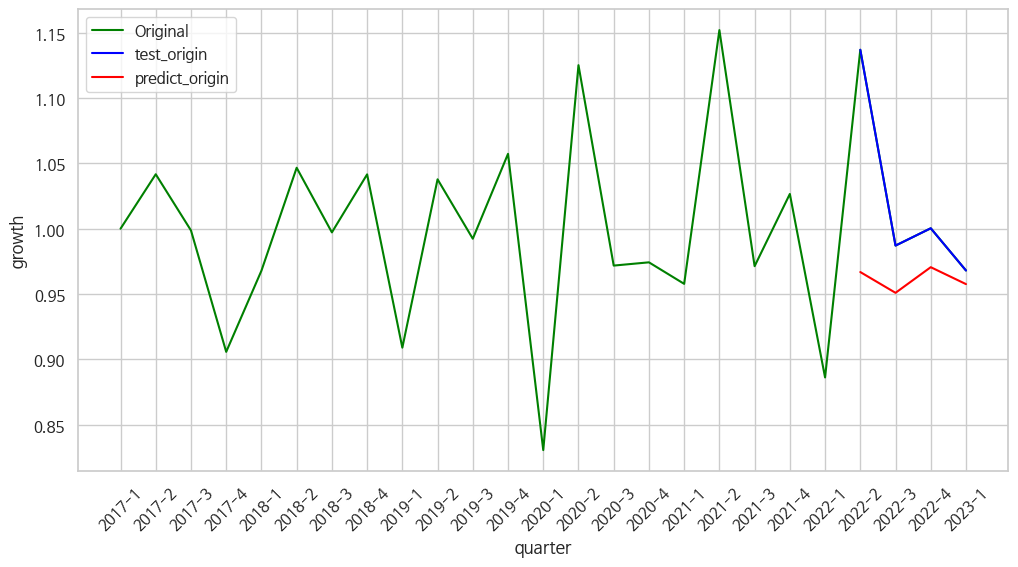

In [96]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [97]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.061618
std      0.073159
min      0.010415
25%      0.024941
50%      0.032968
75%      0.069646
max      0.170123
dtype: float64

In [98]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 24ms/step
[[0.4039983]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9604038596153259 


### 시장성

In [99]:
### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.827619e+10  1.000000  2.531646
1   1.903782e+10  1.041673  3.265306
2   1.901232e+10  0.998661 -0.823045
3   1.722019e+10  0.905739 -0.829876
4   1.666645e+10  0.967844  0.000000
5   1.744378e+10  1.046640 -0.836820
6   1.739449e+10  0.997174 -1.271186
7   1.811763e+10  1.041573  0.421941
8   1.646780e+10  0.908938  0.429185
9   1.709012e+10  1.037790  1.271186
10  1.695894e+10  0.992324 -0.425532
11  1.793059e+10  1.057294 -2.575107
12  1.489187e+10  0.830529 -0.431034
13  1.675560e+10  1.125151 -1.298701
14  1.628249e+10  0.971764  1.702128
15  1.586331e+10  0.974256  0.843882
16  1.519354e+10  0.957779  4.819277
17  1.750300e+10  1.152003  1.195219
18  1.700083e+10  0.971309  1.185771
19  1.745284e+10  1.026588  1.190476
20  1.546588e+10  0.886152  1.562500
21  1.758379e+10  1.136941  1.171875
22  1.735643e+10  0.987070 -1.587302
23  1.736201e+10  1.000322  0.781250
24  1.616775e+10  0.968001 -0.525246
--------------------------------------

In [100]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [101]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.59579655 0.52816974 0.45390625]
 [0.30774174 0.42763029 0.27721868]]


In [102]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [103]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3087
Epoch 1: val_loss improved from inf to 0.27688, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3087 - val_loss: 0.2769
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3075
Epoch 2: val_loss improved from 0.27688 to 0.27574, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.3075 - val_loss: 0.2757
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3063
Epoch 3: val_loss improved from 0.27574 to 0.27460, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3063 - val_loss: 0.2746
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3051
Epoch 4: val_loss improved from 0.27460 to 0.27347, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3051 - val_loss: 0.2735
Epoch 5/300
1/1 [=================

In [105]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 647ms/step
[[0.42598027]
 [0.39330262]
 [0.4799576 ]
 [0.3917649 ]]


In [106]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.460090,0.425980
2022-3,0.448876,0.393303
2022-4,0.415139,0.479958
2023-1,0.399732,0.391765


In [107]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 5].values       # 시장성이 ap_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.460090,0.425980,2.872793e+07,28258442.0,469491.877229
2022-3,0.448876,0.393303,2.857358e+07,27808654.0,764929.506982
2022-4,0.415139,0.479958,2.810921e+07,29001406.0,-892192.839047
2023-1,0.399732,0.391765,2.789715e+07,27787486.0,109668.000000


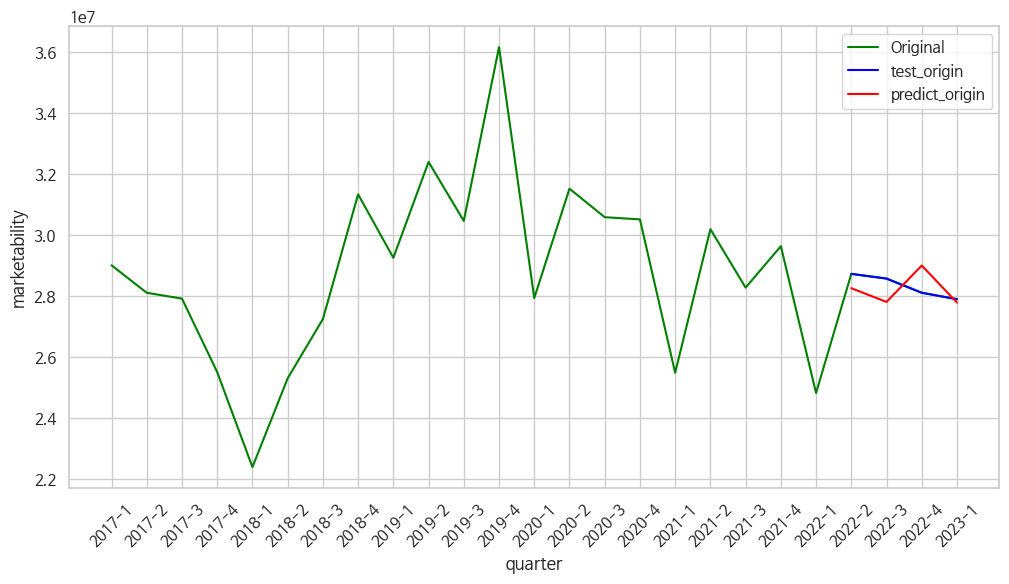

In [108]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [109]:
### error의 요약 통계량
error.describe()

count         4.000000
mean     112974.136291
std      721692.982698
min     -892192.839047
25%     -140797.209762
50%      289579.938614
75%      543351.284667
max      764929.506982
dtype: float64

In [110]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.40831017]]
--------------------------------------------------------------------------------
예측된 시장성  : 28015222.0 


### 순점포증감률

In [111]:
### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '성장성', '시장성']]
y = ap_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.827619e+10  1.000000  2.900864e+07
1   1.903782e+10  1.041673  2.810842e+07
2   1.901232e+10  0.998661  2.791689e+07
3   1.722019e+10  0.905739  2.550818e+07
4   1.666645e+10  0.967844  2.239508e+07
5   1.744378e+10  1.046640  2.530424e+07
6   1.739449e+10  0.997174  2.724746e+07
7   1.811763e+10  1.041573  3.133395e+07
8   1.646780e+10  0.908938  2.925505e+07
9   1.709012e+10  1.037790  3.239644e+07
10  1.695894e+10  0.992324  3.046200e+07
11  1.793059e+10  1.057294  3.615947e+07
12  1.489187e+10  0.830529  2.793465e+07
13  1.675560e+10  1.125151  3.151966e+07
14  1.628249e+10  0.971764  3.058536e+07
15  1.586331e+10  0.974256  3.051410e+07
16  1.519354e+10  0.957779  2.548676e+07
17  1.750300e+10  1.152003  3.019326e+07
18  1.700083e+10  0.971309  2.827732e+07
19  1.745284e+10  1.026588  2.963493e+07
20  1.546588e+10  0.886152  2.482405e+07
21  1.758379e+10  1.136941  2.872793e+07
22  1.735643e+10  0.987070  2.857358e+07
23  1.736201e+10

In [112]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [113]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.59579655 0.52816974 0.41513869]
 [0.30774174 0.42763029 0.39973233]]


In [114]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [115]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [116]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1166
Epoch 1: val_loss improved from inf to 0.36430, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1166 - val_loss: 0.3643
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1158
Epoch 2: val_loss improved from 0.36430 to 0.36297, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1158 - val_loss: 0.3630
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1150
Epoch 3: val_loss improved from 0.36297 to 0.36165, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1150 - val_loss: 0.3616
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1142
Epoch 4: val_loss improved from 0.36165 to 0.36033, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.1142 - val_loss: 0.3603
Epoch 5/300
1/1 [=================

In [117]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 624ms/step
[[0.24782917]
 [0.20973903]
 [0.29650676]
 [0.2728285 ]]


In [118]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.506734,0.247829
2022-3,0.133589,0.209739
2022-4,0.453906,0.296507
2023-1,0.277219,0.272828


In [119]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.506734,0.247829,1.171875,-0.742563,1.914438
2022-3,0.133589,0.209739,-1.587302,-1.024216,-0.563085
2022-4,0.453906,0.296507,0.781250,-0.382622,1.163872
2023-1,0.277219,0.272828,-0.525246,-0.557709,0.032463


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


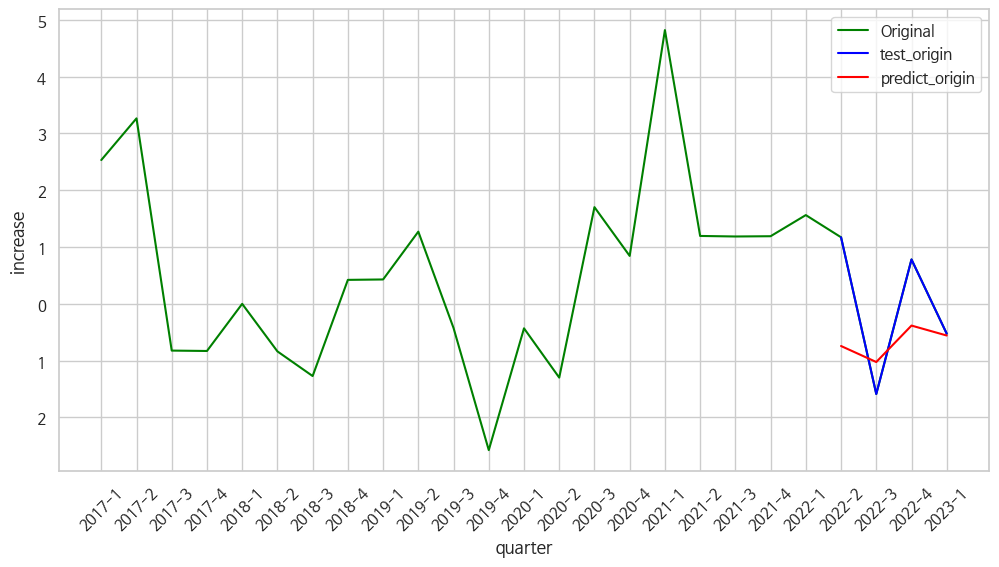

In [120]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [121]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.636922
std      1.112821
min     -0.563085
25%     -0.116424
50%      0.598168
75%      1.351514
max      1.914438
dtype: float64

In [122]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 20ms/step
[[0.25594786]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.682530403137207 


### 추가


In [123]:
ap_hair.loc[25] = ['2023-2', '미용실수리리', sales, growth, increase, marketability]

<ipython-input-123-e439c8c7acb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_hair.loc[25] = ['2023-2', '미용실수리리', sales, growth, increase, marketability]


In [124]:
ap_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,1.827619e+10,1.000000,2.531646,2.900864e+07
1,2017-2,미용실,1.903782e+10,1.041673,3.265306,2.810842e+07
2,2017-3,미용실,1.901232e+10,0.998661,-0.823045,2.791689e+07
3,2017-4,미용실,1.722019e+10,0.905739,-0.829876,2.550818e+07
4,2018-1,미용실,1.666645e+10,0.967844,0.000000,2.239508e+07
5,2018-2,미용실,1.744378e+10,1.046640,-0.836820,2.530424e+07
6,2018-3,미용실,1.739449e+10,0.997174,-1.271186,2.724746e+07
7,2018-4,미용실,1.811763e+10,1.041573,0.421941,3.133395e+07
8,2019-1,미용실,1.646780e+10,0.908938,0.429185,2.925505e+07
9,2019-2,미용실,1.709012e+10,1.037790,1.271186,3.239644e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [125]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_hair[['성장성', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  2.900864e+07  2.531646
1   1.041673  2.810842e+07  3.265306
2   0.998661  2.791689e+07 -0.823045
3   0.905739  2.550818e+07 -0.829876
4   0.967844  2.239508e+07  0.000000
5   1.046640  2.530424e+07 -0.836820
6   0.997174  2.724746e+07 -1.271186
7   1.041573  3.133395e+07  0.421941
8   0.908938  2.925505e+07  0.429185
9   1.037790  3.239644e+07  1.271186
10  0.992324  3.046200e+07 -0.425532
11  1.057294  3.615947e+07 -2.575107
12  0.830529  2.793465e+07 -0.431034
13  1.125151  3.151966e+07 -1.298701
14  0.971764  3.058536e+07  1.702128
15  0.974256  3.051410e+07  0.843882
16  0.957779  2.548676e+07  4.819277
17  1.152003  3.019326e+07  1.195219
18  0.971309  2.827732e+07  1.185771
19  1.026588  2.963493e+07  1.190476
20  0.886152  2.482405e+07  1.562500
21  1.136941  2.872793e+07  1.171875
22  0.987070  2.857358e+07 -1.587302
23  1.000322  2.810921e+07  0.781250
24  0.968001  2.789715e+07 -0.525246
25  0.960404  2.801522e+07 -0.682530
-

In [126]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [127]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.42763029 0.39973233 0.27721868]
 [0.40399826 0.40831012 0.25594786]]


In [128]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [129]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [130]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3819
Epoch 1: val_loss improved from inf to 0.22800, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3819 - val_loss: 0.2280
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3806
Epoch 2: val_loss improved from 0.22800 to 0.22694, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.3806 - val_loss: 0.2269
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3792
Epoch 3: val_loss improved from 0.22694 to 0.22589, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3792 - val_loss: 0.2259
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3779
Epoch 4: val_loss improved from 0.22589 to 0.22484, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3779 - val_loss: 0.2248
Epoch 5/300
1/1 [=================

In [131]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 632ms/step
[[0.36165035]
 [0.42156515]
 [0.332547  ]
 [0.359091  ]]


In [132]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.594449,0.361650
2022-4,0.595797,0.421565
2023-1,0.307742,0.332547
2023-2,0.342411,0.359091


In [133]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.594449,0.361650,1.735643e+10,1.639125e+10,965171984.0
2022-4,0.595797,0.421565,1.736201e+10,1.663966e+10,722355020.0
2023-1,0.307742,0.332547,1.616775e+10,1.627059e+10,-102841344.0
2023-2,0.342411,0.359091,1.631149e+10,1.638064e+10,-69151744.0


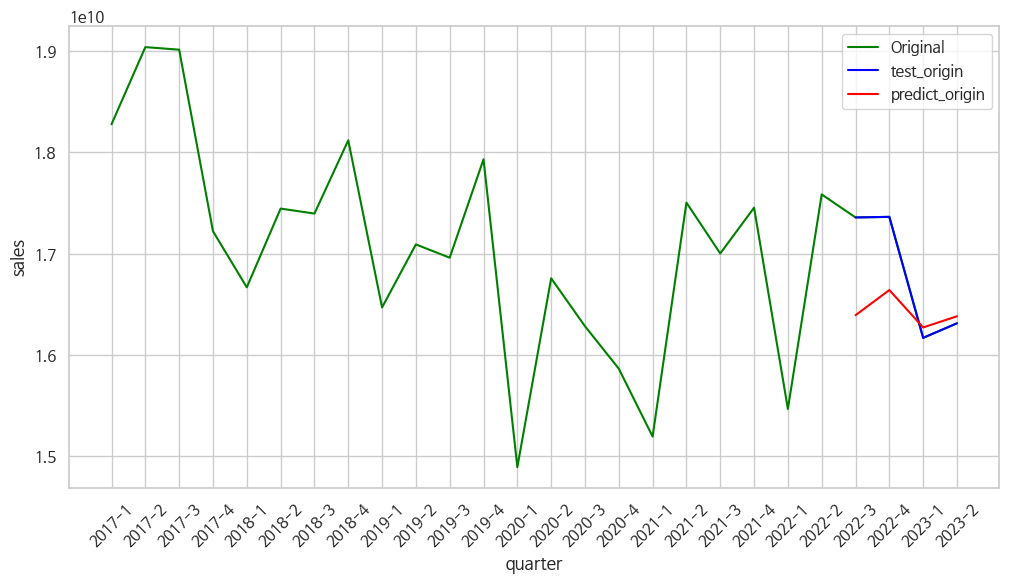

In [134]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [135]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.788835e+08
std      5.460468e+08
min     -1.028413e+08
25%     -7.757414e+07
50%      3.266016e+08
75%      7.830593e+08
max      9.651720e+08
dtype: float64

In [136]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.31910935]]
--------------------------------------------------------------------------------
예측된 매출  : 16214881280.0 


### 성장성

In [137]:
X = ap_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.827619e+10  2.900864e+07  2.531646
1   1.903782e+10  2.810842e+07  3.265306
2   1.901232e+10  2.791689e+07 -0.823045
3   1.722019e+10  2.550818e+07 -0.829876
4   1.666645e+10  2.239508e+07  0.000000
5   1.744378e+10  2.530424e+07 -0.836820
6   1.739449e+10  2.724746e+07 -1.271186
7   1.811763e+10  3.133395e+07  0.421941
8   1.646780e+10  2.925505e+07  0.429185
9   1.709012e+10  3.239644e+07  1.271186
10  1.695894e+10  3.046200e+07 -0.425532
11  1.793059e+10  3.615947e+07 -2.575107
12  1.489187e+10  2.793465e+07 -0.431034
13  1.675560e+10  3.151966e+07 -1.298701
14  1.628249e+10  3.058536e+07  1.702128
15  1.586331e+10  3.051410e+07  0.843882
16  1.519354e+10  2.548676e+07  4.819277
17  1.750300e+10  3.019326e+07  1.195219
18  1.700083e+10  2.827732e+07  1.185771
19  1.745284e+10  2.963493e+07  1.190476
20  1.546588e+10  2.482405e+07  1.562500
21  1.758379e+10  2.872793e+07  1.171875
22  1.735643e+10  2.857358e+07 -1.587302
23  1.736201e+10

In [138]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [139]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.30774174 0.39973233 0.27721868]
 [0.34241149 0.40831012 0.25594786]]


In [140]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [141]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3377
Epoch 1: val_loss improved from inf to 0.41062, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3377 - val_loss: 0.4106
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3364
Epoch 2: val_loss improved from 0.41062 to 0.40931, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.3364 - val_loss: 0.4093
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3352
Epoch 3: val_loss improved from 0.40931 to 0.40801, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.3352 - val_loss: 0.4080
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3339
Epoch 4: val_loss improved from 0.40801 to 0.40671, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3339 - val_loss: 0.4067
Epoch 5/300
1/1 [=================

In [143]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 952ms/step
[[0.39724472]
 [0.4704646 ]
 [0.42936596]
 [0.43615323]]


In [144]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.486947,0.397245
2022-4,0.528170,0.470465
2023-1,0.427630,0.429366
2023-2,0.403998,0.436153


In [145]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 3].values       # 성장성이 ap_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.486947,0.397245,0.987070,0.958233,0.028837
2022-4,0.528170,0.470465,1.000322,0.981771,0.018551
2023-1,0.427630,0.429366,0.968001,0.968559,-0.000558
2023-2,0.403998,0.436153,0.960404,0.970741,-0.010337


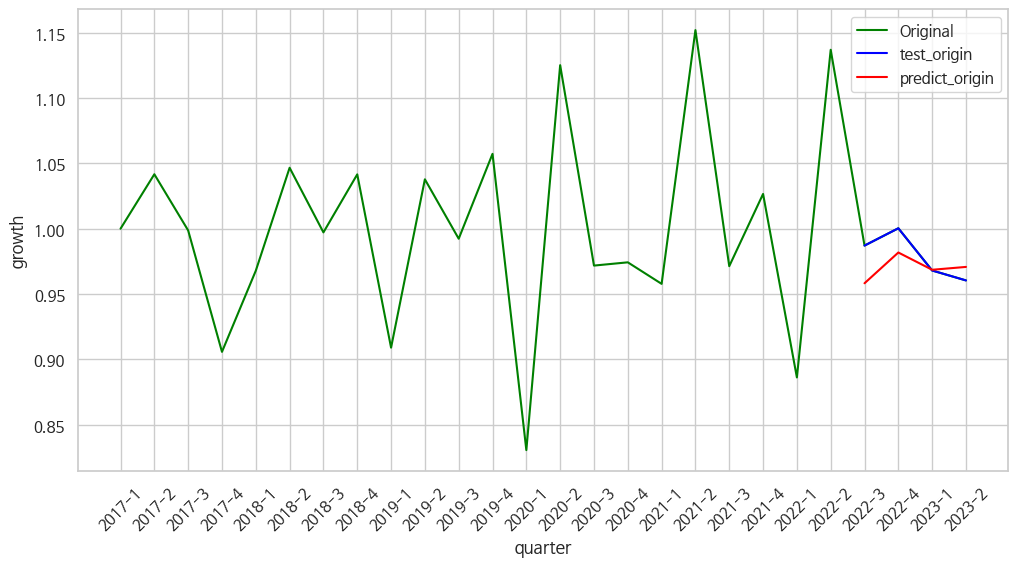

In [146]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [147]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.009123
std      0.017795
min     -0.010337
25%     -0.003003
50%      0.008996
75%      0.021122
max      0.028837
dtype: float64

In [148]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 31ms/step
[[0.36407134]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9475683569908142 


### 시장성

In [149]:
### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.827619e+10  1.000000  2.531646
1   1.903782e+10  1.041673  3.265306
2   1.901232e+10  0.998661 -0.823045
3   1.722019e+10  0.905739 -0.829876
4   1.666645e+10  0.967844  0.000000
5   1.744378e+10  1.046640 -0.836820
6   1.739449e+10  0.997174 -1.271186
7   1.811763e+10  1.041573  0.421941
8   1.646780e+10  0.908938  0.429185
9   1.709012e+10  1.037790  1.271186
10  1.695894e+10  0.992324 -0.425532
11  1.793059e+10  1.057294 -2.575107
12  1.489187e+10  0.830529 -0.431034
13  1.675560e+10  1.125151 -1.298701
14  1.628249e+10  0.971764  1.702128
15  1.586331e+10  0.974256  0.843882
16  1.519354e+10  0.957779  4.819277
17  1.750300e+10  1.152003  1.195219
18  1.700083e+10  0.971309  1.185771
19  1.745284e+10  1.026588  1.190476
20  1.546588e+10  0.886152  1.562500
21  1.758379e+10  1.136941  1.171875
22  1.735643e+10  0.987070 -1.587302
23  1.736201e+10  1.000322  0.781250
24  1.616775e+10  0.968001 -0.525246
25  1.631149e+10  0.960404 -0.682530
-

In [150]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [151]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.30774174 0.42763029 0.27721868]
 [0.34241149 0.40399826 0.25594786]]


In [152]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [153]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [154]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3219
Epoch 1: val_loss improved from inf to 0.24791, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3219 - val_loss: 0.2479
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3207
Epoch 2: val_loss improved from 0.24791 to 0.24679, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.3207 - val_loss: 0.2468
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3195
Epoch 3: val_loss improved from 0.24679 to 0.24568, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.3195 - val_loss: 0.2457
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3183
Epoch 4: val_loss improved from 0.24568 to 0.24458, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.3183 - val_loss: 0.2446
Epoch 5/300
1/1 [================

In [155]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 642ms/step
[[0.4040145]
 [0.502987 ]
 [0.4107565]
 [0.4247782]]


In [156]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.448876,0.404014
2022-4,0.415139,0.502987
2023-1,0.399732,0.410756
2023-2,0.408310,0.424778


In [157]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 5].values       # 시장성이 ap_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.448876,0.404014,2.857358e+07,27956096.0,6.174875e+05
2022-4,0.415139,0.502987,2.810921e+07,29318394.0,-1.209181e+06
2023-1,0.399732,0.410756,2.789715e+07,28048896.0,-1.517420e+05
2023-2,0.408310,0.424778,2.801522e+07,28241896.0,-2.266740e+05


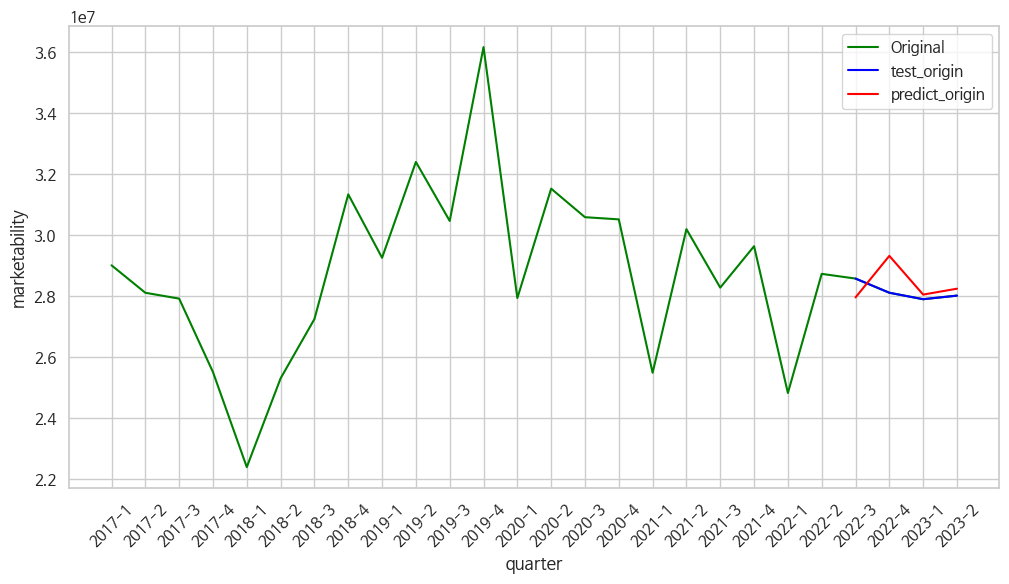

In [158]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [159]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -2.425273e+05
std      7.488965e+05
min     -1.209181e+06
25%     -4.723007e+05
50%     -1.892080e+05
75%      4.056538e+04
max      6.174875e+05
dtype: float64

In [160]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 20ms/step
[[0.3526215]]
--------------------------------------------------------------------------------
예측된 시장성  : 27248702.0 


### 순점포증감률

In [161]:
### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '성장성', '시장성']]
y = ap_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.827619e+10  1.000000  2.900864e+07
1   1.903782e+10  1.041673  2.810842e+07
2   1.901232e+10  0.998661  2.791689e+07
3   1.722019e+10  0.905739  2.550818e+07
4   1.666645e+10  0.967844  2.239508e+07
5   1.744378e+10  1.046640  2.530424e+07
6   1.739449e+10  0.997174  2.724746e+07
7   1.811763e+10  1.041573  3.133395e+07
8   1.646780e+10  0.908938  2.925505e+07
9   1.709012e+10  1.037790  3.239644e+07
10  1.695894e+10  0.992324  3.046200e+07
11  1.793059e+10  1.057294  3.615947e+07
12  1.489187e+10  0.830529  2.793465e+07
13  1.675560e+10  1.125151  3.151966e+07
14  1.628249e+10  0.971764  3.058536e+07
15  1.586331e+10  0.974256  3.051410e+07
16  1.519354e+10  0.957779  2.548676e+07
17  1.750300e+10  1.152003  3.019326e+07
18  1.700083e+10  0.971309  2.827732e+07
19  1.745284e+10  1.026588  2.963493e+07
20  1.546588e+10  0.886152  2.482405e+07
21  1.758379e+10  1.136941  2.872793e+07
22  1.735643e+10  0.987070  2.857358e+07
23  1.736201e+10

In [162]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [163]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.30774174 0.42763029 0.39973233]
 [0.34241149 0.40399826 0.40831012]]


In [164]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [165]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [166]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1102
Epoch 1: val_loss improved from inf to 0.39451, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1102 - val_loss: 0.3945
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1094
Epoch 2: val_loss improved from 0.39451 to 0.39310, saving model to stock_model.h5
1/1 [==============================] - 0s 102ms/step - loss: 0.1094 - val_loss: 0.3931
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1086
Epoch 3: val_loss improved from 0.39310 to 0.39169, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.1086 - val_loss: 0.3917
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1079
Epoch 4: val_loss improved from 0.39169 to 0.39029, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1079 - val_loss: 0.3903
Epoch 5/300
1/1 [================

In [167]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 947ms/step
[[0.20197904]
 [0.28436556]
 [0.26195183]
 [0.24542364]]


In [168]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.133589,0.201979
2022-4,0.453906,0.284366
2023-1,0.277219,0.261952
2023-2,0.255948,0.245424


In [169]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.133589,0.201979,-1.587302,-1.081597,-0.505705
2022-4,0.453906,0.284366,0.781250,-0.472399,1.253649
2023-1,0.277219,0.261952,-0.525246,-0.638135,0.112889
2023-2,0.255948,0.245424,-0.682530,-0.760351,0.077820


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


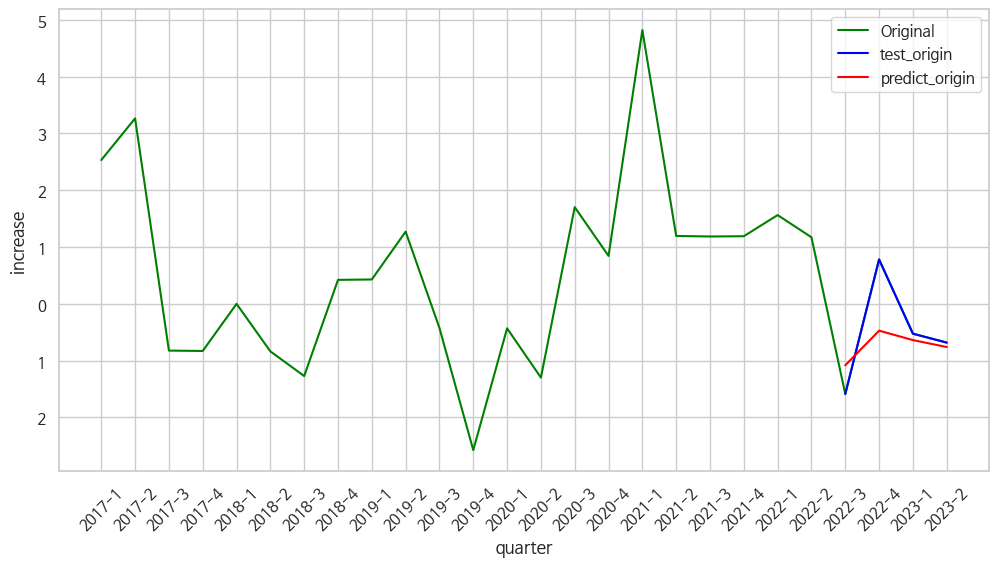

In [170]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [171]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.234663
std      0.736185
min     -0.505705
25%     -0.068061
50%      0.095354
75%      0.398079
max      1.253649
dtype: float64

In [172]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 36ms/step
[[0.21605831]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.9774890542030334 


### 추가

In [173]:
ap_hair.loc[26] = ['2023-3', '미용실', sales, growth, increase, marketability]

<ipython-input-173-764de57f6db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_hair.loc[26] = ['2023-3', '미용실', sales, growth, increase, marketability]


In [174]:
ap_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,1.827619e+10,1.000000,2.531646,2.900864e+07
1,2017-2,미용실,1.903782e+10,1.041673,3.265306,2.810842e+07
2,2017-3,미용실,1.901232e+10,0.998661,-0.823045,2.791689e+07
3,2017-4,미용실,1.722019e+10,0.905739,-0.829876,2.550818e+07
4,2018-1,미용실,1.666645e+10,0.967844,0.000000,2.239508e+07
5,2018-2,미용실,1.744378e+10,1.046640,-0.836820,2.530424e+07
6,2018-3,미용실,1.739449e+10,0.997174,-1.271186,2.724746e+07
7,2018-4,미용실,1.811763e+10,1.041573,0.421941,3.133395e+07
8,2019-1,미용실,1.646780e+10,0.908938,0.429185,2.925505e+07
9,2019-2,미용실,1.709012e+10,1.037790,1.271186,3.239644e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [175]:
### X / y 데이터 생성
X = ap_hair[['성장성', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  2.900864e+07  2.531646
1   1.041673  2.810842e+07  3.265306
2   0.998661  2.791689e+07 -0.823045
3   0.905739  2.550818e+07 -0.829876
4   0.967844  2.239508e+07  0.000000
5   1.046640  2.530424e+07 -0.836820
6   0.997174  2.724746e+07 -1.271186
7   1.041573  3.133395e+07  0.421941
8   0.908938  2.925505e+07  0.429185
9   1.037790  3.239644e+07  1.271186
10  0.992324  3.046200e+07 -0.425532
11  1.057294  3.615947e+07 -2.575107
12  0.830529  2.793465e+07 -0.431034
13  1.125151  3.151966e+07 -1.298701
14  0.971764  3.058536e+07  1.702128
15  0.974256  3.051410e+07  0.843882
16  0.957779  2.548676e+07  4.819277
17  1.152003  3.019326e+07  1.195219
18  0.971309  2.827732e+07  1.185771
19  1.026588  2.963493e+07  1.190476
20  0.886152  2.482405e+07  1.562500
21  1.136941  2.872793e+07  1.171875
22  0.987070  2.857358e+07 -1.587302
23  1.000322  2.810921e+07  0.781250
24  0.968001  2.789715e+07 -0.525246
25  0.960404  2.801522e+07 -0.682530
2

In [176]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [177]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.40399826 0.40831012 0.25594786]
 [0.36407124 0.3526215  0.21605832]]


In [178]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [179]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3819
Epoch 1: val_loss improved from inf to 0.24459, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3819 - val_loss: 0.2446
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3806
Epoch 2: val_loss improved from 0.24459 to 0.24350, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3806 - val_loss: 0.2435
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3792
Epoch 3: val_loss improved from 0.24350 to 0.24241, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.3792 - val_loss: 0.2424
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3779
Epoch 4: val_loss improved from 0.24241 to 0.24132, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.3779 - val_loss: 0.2413
Epoch 5/300
1/1 [=================

In [181]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 621ms/step
[[0.44578028]
 [0.3503104 ]
 [0.37880528]
 [0.33612537]]


In [182]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.595797,0.445780
2023-1,0.307742,0.350310
2023-2,0.342411,0.378805
2023-3,0.319109,0.336125


In [183]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.595797,0.445780,1.736201e+10,1.674005e+10,621960012.0
2023-1,0.307742,0.350310,1.616775e+10,1.634424e+10,-176487424.0
2023-2,0.342411,0.378805,1.631149e+10,1.646238e+10,-150886400.0
2023-3,0.319109,0.336125,1.621488e+10,1.628543e+10,-70547456.0


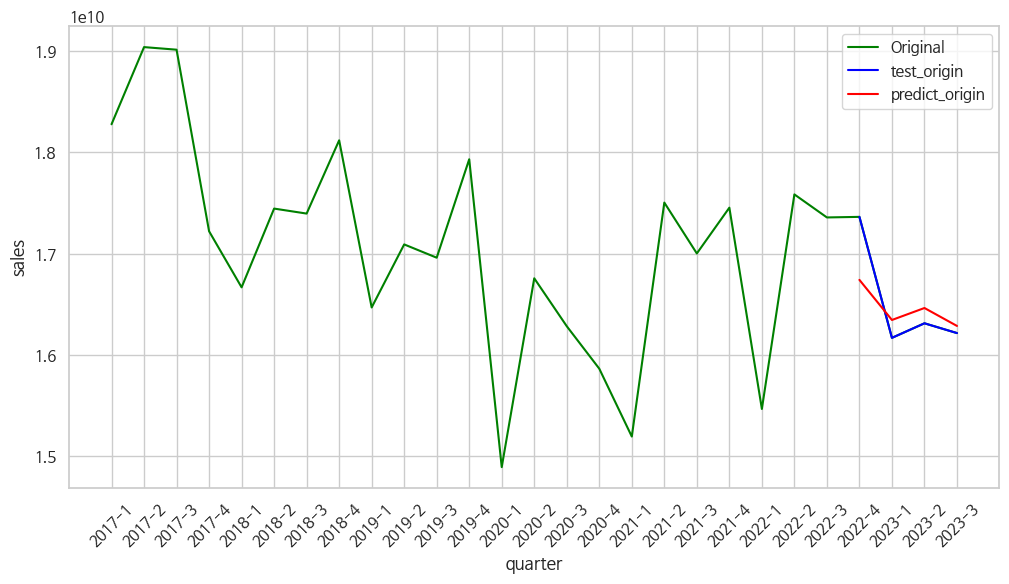

In [184]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [185]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.600968e+07
std      3.799901e+08
min     -1.764874e+08
25%     -1.572867e+08
50%     -1.107169e+08
75%      1.025794e+08
max      6.219600e+08
dtype: float64

In [186]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 19ms/step
[[0.32338908]]
--------------------------------------------------------------------------------
예측된 매출  : 16232625152.0 


### 성장성

In [187]:
X = ap_hair[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.827619e+10  2.900864e+07  2.531646
1   1.903782e+10  2.810842e+07  3.265306
2   1.901232e+10  2.791689e+07 -0.823045
3   1.722019e+10  2.550818e+07 -0.829876
4   1.666645e+10  2.239508e+07  0.000000
5   1.744378e+10  2.530424e+07 -0.836820
6   1.739449e+10  2.724746e+07 -1.271186
7   1.811763e+10  3.133395e+07  0.421941
8   1.646780e+10  2.925505e+07  0.429185
9   1.709012e+10  3.239644e+07  1.271186
10  1.695894e+10  3.046200e+07 -0.425532
11  1.793059e+10  3.615947e+07 -2.575107
12  1.489187e+10  2.793465e+07 -0.431034
13  1.675560e+10  3.151966e+07 -1.298701
14  1.628249e+10  3.058536e+07  1.702128
15  1.586331e+10  3.051410e+07  0.843882
16  1.519354e+10  2.548676e+07  4.819277
17  1.750300e+10  3.019326e+07  1.195219
18  1.700083e+10  2.827732e+07  1.185771
19  1.745284e+10  2.963493e+07  1.190476
20  1.546588e+10  2.482405e+07  1.562500
21  1.758379e+10  2.872793e+07  1.171875
22  1.735643e+10  2.857358e+07 -1.587302
23  1.736201e+10

In [188]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [189]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.34241149 0.40831012 0.25594786]
 [0.31910937 0.3526215  0.21605832]]


In [190]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [191]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [192]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3377
Epoch 1: val_loss improved from inf to 0.39342, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3377 - val_loss: 0.3934
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3364
Epoch 2: val_loss improved from 0.39342 to 0.39214, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.3364 - val_loss: 0.3921
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3352
Epoch 3: val_loss improved from 0.39214 to 0.39087, saving model to stock_model.h5
1/1 [==============================] - 0s 110ms/step - loss: 0.3352 - val_loss: 0.3909
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3339
Epoch 4: val_loss improved from 0.39087 to 0.38960, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.3339 - val_loss: 0.3896
Epoch 5/300
1/1 [================

In [193]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 929ms/step
[[0.4704646 ]
 [0.42936596]
 [0.43615323]
 [0.36407137]]


In [194]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.528170,0.470465
2023-1,0.427630,0.429366
2023-2,0.403998,0.436153
2023-3,0.364071,0.364071


In [195]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 3].values       # 성장성이 ap_hair의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.528170,0.470465,1.000322,0.981771,0.018551
2023-1,0.427630,0.429366,0.968001,0.968559,-0.000558
2023-2,0.403998,0.436153,0.960404,0.970741,-0.010337
2023-3,0.364071,0.364071,0.947568,0.947568,0.000000


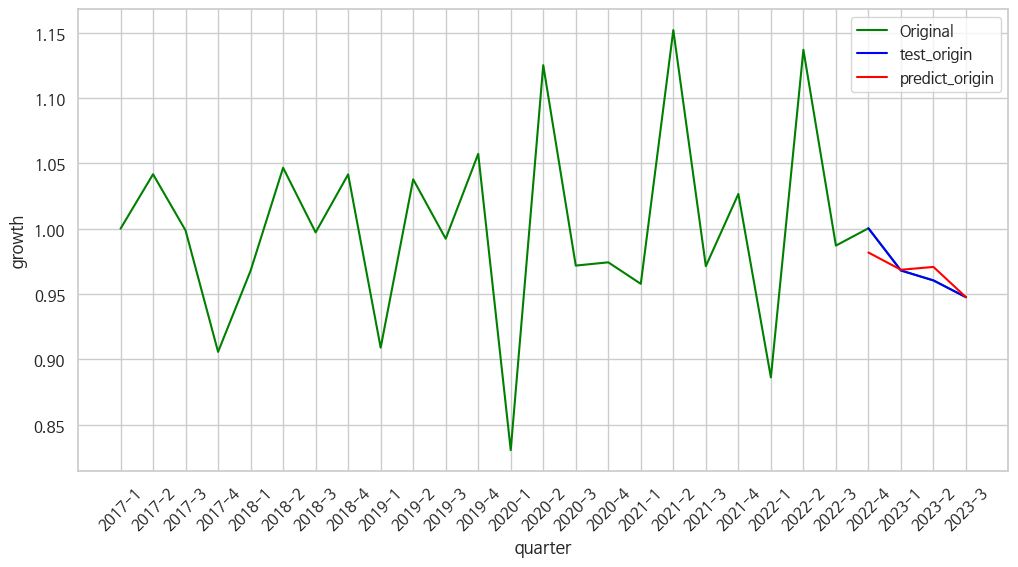

In [196]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [197]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.001914
std      0.012064
min     -0.010337
25%     -0.003003
50%     -0.000279
75%      0.004638
max      0.018551
dtype: float64

In [198]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 23ms/step
[[0.36086732]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9465383887290955 


###시장성

In [199]:
### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_hair.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.827619e+10  1.000000  2.531646
1   1.903782e+10  1.041673  3.265306
2   1.901232e+10  0.998661 -0.823045
3   1.722019e+10  0.905739 -0.829876
4   1.666645e+10  0.967844  0.000000
5   1.744378e+10  1.046640 -0.836820
6   1.739449e+10  0.997174 -1.271186
7   1.811763e+10  1.041573  0.421941
8   1.646780e+10  0.908938  0.429185
9   1.709012e+10  1.037790  1.271186
10  1.695894e+10  0.992324 -0.425532
11  1.793059e+10  1.057294 -2.575107
12  1.489187e+10  0.830529 -0.431034
13  1.675560e+10  1.125151 -1.298701
14  1.628249e+10  0.971764  1.702128
15  1.586331e+10  0.974256  0.843882
16  1.519354e+10  0.957779  4.819277
17  1.750300e+10  1.152003  1.195219
18  1.700083e+10  0.971309  1.185771
19  1.745284e+10  1.026588  1.190476
20  1.546588e+10  0.886152  1.562500
21  1.758379e+10  1.136941  1.171875
22  1.735643e+10  0.987070 -1.587302
23  1.736201e+10  1.000322  0.781250
24  1.616775e+10  0.968001 -0.525246
25  1.631149e+10  0.960404 -0.682530
2

In [200]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [201]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.34241149 0.40399826 0.25594786]
 [0.31910937 0.36407124 0.21605832]]


In [202]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [203]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [204]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3219
Epoch 1: val_loss improved from inf to 0.24547, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3219 - val_loss: 0.2455
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3207
Epoch 2: val_loss improved from 0.24547 to 0.24436, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.3207 - val_loss: 0.2444
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3195
Epoch 3: val_loss improved from 0.24436 to 0.24325, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3195 - val_loss: 0.2432
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3183
Epoch 4: val_loss improved from 0.24325 to 0.24215, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.3183 - val_loss: 0.2421
Epoch 5/300
1/1 [=================

In [205]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 646ms/step
[[0.502987 ]
 [0.4107565]
 [0.4247782]
 [0.3526215]]


In [206]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.415139,0.502987
2023-1,0.399732,0.410756
2023-2,0.408310,0.424778
2023-3,0.352621,0.352621


In [207]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 5].values       # 시장성이 ap_hair의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.415139,0.502987,2.810921e+07,29318394.0,-1.209181e+06
2023-1,0.399732,0.410756,2.789715e+07,28048896.0,-1.517420e+05
2023-2,0.408310,0.424778,2.801522e+07,28241896.0,-2.266740e+05
2023-3,0.352621,0.352621,2.724870e+07,27248702.0,0.000000e+00


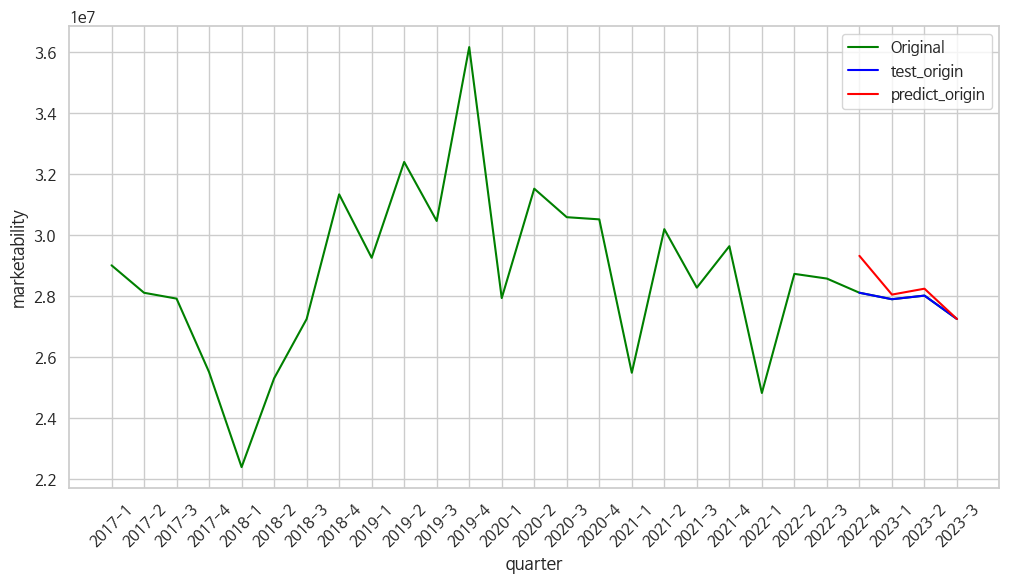

In [208]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [209]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.968992e+05
std      5.496693e+05
min     -1.209181e+06
25%     -4.723007e+05
50%     -1.892080e+05
75%     -1.138065e+05
max      0.000000e+00
dtype: float64

In [210]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 26ms/step
[[0.3451794]]
--------------------------------------------------------------------------------
예측된 시장성  : 27146266.0 


### 순점포증감률

In [211]:
### X / y 데이터 생성
X = ap_hair[['분기당_매출_금액', '성장성', '시장성']]
y = ap_hair.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.827619e+10  1.000000  2.900864e+07
1   1.903782e+10  1.041673  2.810842e+07
2   1.901232e+10  0.998661  2.791689e+07
3   1.722019e+10  0.905739  2.550818e+07
4   1.666645e+10  0.967844  2.239508e+07
5   1.744378e+10  1.046640  2.530424e+07
6   1.739449e+10  0.997174  2.724746e+07
7   1.811763e+10  1.041573  3.133395e+07
8   1.646780e+10  0.908938  2.925505e+07
9   1.709012e+10  1.037790  3.239644e+07
10  1.695894e+10  0.992324  3.046200e+07
11  1.793059e+10  1.057294  3.615947e+07
12  1.489187e+10  0.830529  2.793465e+07
13  1.675560e+10  1.125151  3.151966e+07
14  1.628249e+10  0.971764  3.058536e+07
15  1.586331e+10  0.974256  3.051410e+07
16  1.519354e+10  0.957779  2.548676e+07
17  1.750300e+10  1.152003  3.019326e+07
18  1.700083e+10  0.971309  2.827732e+07
19  1.745284e+10  1.026588  2.963493e+07
20  1.546588e+10  0.886152  2.482405e+07
21  1.758379e+10  1.136941  2.872793e+07
22  1.735643e+10  0.987070  2.857358e+07
23  1.736201e+10

In [212]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [213]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.34241149 0.40399826 0.40831012]
 [0.31910937 0.36407124 0.3526215 ]]


In [214]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [215]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [216]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1102
Epoch 1: val_loss improved from inf to 0.35344, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1102 - val_loss: 0.3534
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1094
Epoch 2: val_loss improved from 0.35344 to 0.35214, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.1094 - val_loss: 0.3521
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1086
Epoch 3: val_loss improved from 0.35214 to 0.35086, saving model to stock_model.h5
1/1 [==============================] - 0s 114ms/step - loss: 0.1086 - val_loss: 0.3509
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1079
Epoch 4: val_loss improved from 0.35086 to 0.34957, saving model to stock_model.h5
1/1 [==============================] - 0s 114ms/step - loss: 0.1079 - val_loss: 0.3496
Epoch 5/300
1/1 [==============

In [217]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 922ms/step
[[0.28436556]
 [0.26195183]
 [0.24542364]
 [0.21605833]]


In [218]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.453906,0.284366
2023-1,0.277219,0.261952
2023-2,0.255948,0.245424
2023-3,0.216058,0.216058


In [219]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_hair의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.453906,0.284366,0.781250,-0.472399,1.253649e+00
2023-1,0.277219,0.261952,-0.525246,-0.638135,1.128889e-01
2023-2,0.255948,0.245424,-0.682530,-0.760351,7.782012e-02
2023-3,0.216058,0.216058,-0.977489,-0.977489,-1.192093e-07


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


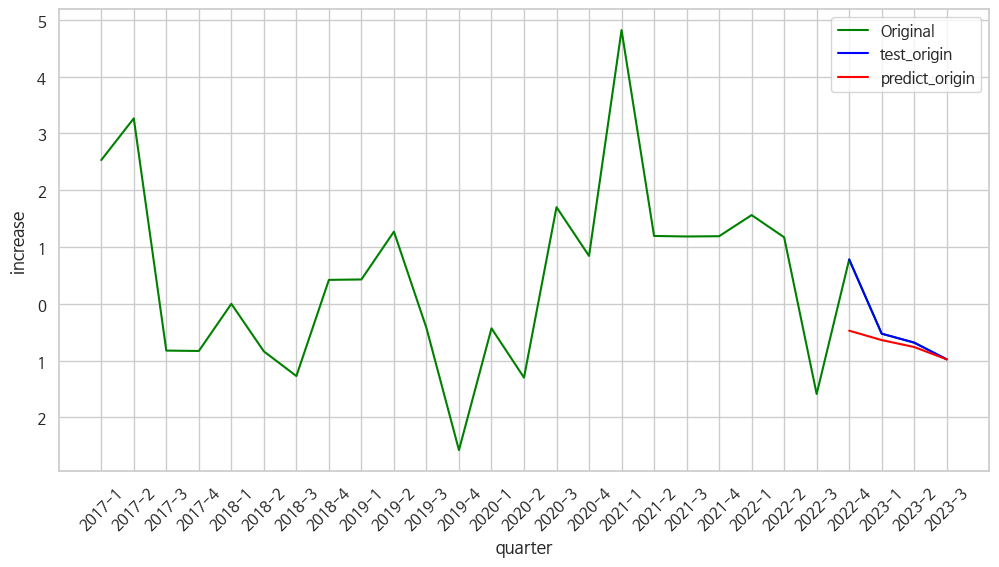

In [220]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_hair['분기'], ap_hair['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [221]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.610895e-01
std      5.969068e-01
min     -1.192093e-07
25%      5.836506e-02
50%      9.535450e-02
75%      3.980789e-01
max      1.253649e+00
dtype: float64

In [222]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 27ms/step
[[0.21530433]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.9830642938613892 


### 추가

In [223]:
ap_hair.loc[27] = ['2023-4', '미용실', sales, growth, increase, marketability]

<ipython-input-223-e367fe24dd92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_hair.loc[27] = ['2023-4', '미용실', sales, growth, increase, marketability]


In [224]:
final_ap_hair = ap_hair
final_ap_hair

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,미용실,1.827619e+10,1.000000,2.531646,2.900864e+07
1,2017-2,미용실,1.903782e+10,1.041673,3.265306,2.810842e+07
2,2017-3,미용실,1.901232e+10,0.998661,-0.823045,2.791689e+07
3,2017-4,미용실,1.722019e+10,0.905739,-0.829876,2.550818e+07
4,2018-1,미용실,1.666645e+10,0.967844,0.000000,2.239508e+07
5,2018-2,미용실,1.744378e+10,1.046640,-0.836820,2.530424e+07
6,2018-3,미용실,1.739449e+10,0.997174,-1.271186,2.724746e+07
7,2018-4,미용실,1.811763e+10,1.041573,0.421941,3.133395e+07
8,2019-1,미용실,1.646780e+10,0.908938,0.429185,2.925505e+07
9,2019-2,미용실,1.709012e+10,1.037790,1.271186,3.239644e+07


## 최종결과

In [225]:
### X / y 데이터 생성
X = ap_hair[['성장성', '시장성', '순점포증감률']]
y = ap_hair.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  2.900864e+07  2.531646
1   1.041673  2.810842e+07  3.265306
2   0.998661  2.791689e+07 -0.823045
3   0.905739  2.550818e+07 -0.829876
4   0.967844  2.239508e+07  0.000000
5   1.046640  2.530424e+07 -0.836820
6   0.997174  2.724746e+07 -1.271186
7   1.041573  3.133395e+07  0.421941
8   0.908938  2.925505e+07  0.429185
9   1.037790  3.239644e+07  1.271186
10  0.992324  3.046200e+07 -0.425532
11  1.057294  3.615947e+07 -2.575107
12  0.830529  2.793465e+07 -0.431034
13  1.125151  3.151966e+07 -1.298701
14  0.971764  3.058536e+07  1.702128
15  0.974256  3.051410e+07  0.843882
16  0.957779  2.548676e+07  4.819277
17  1.152003  3.019326e+07  1.195219
18  0.971309  2.827732e+07  1.185771
19  1.026588  2.963493e+07  1.190476
20  0.886152  2.482405e+07  1.562500
21  1.136941  2.872793e+07  1.171875
22  0.987070  2.857358e+07 -1.587302
23  1.000322  2.810921e+07  0.781250
24  0.968001  2.789715e+07 -0.525246
25  0.960404  2.801522e+07 -0.682530
2

In [226]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [227]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.36407124 0.3526215  0.21605832]
 [0.36086735 0.34517939 0.21530433]]


In [228]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [229]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [230]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3625
Epoch 1: val_loss improved from inf to 0.27316, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3625 - val_loss: 0.2732
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3613
Epoch 2: val_loss improved from 0.27316 to 0.27197, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.3613 - val_loss: 0.2720
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3600
Epoch 3: val_loss improved from 0.27197 to 0.27079, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3600 - val_loss: 0.2708
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3588
Epoch 4: val_loss improved from 0.27079 to 0.26962, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.3588 - val_loss: 0.2696
Epoch 5/300
1/1 [=================

In [231]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.36235917]
 [0.39222315]
 [0.34771535]
 [0.3344682 ]]


In [232]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_hair.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.307742,0.362359
2023-2,0.342411,0.392223
2023-3,0.319109,0.347715
2023-4,0.323389,0.334468


In [233]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_hair.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_hair의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.307742,0.362359,1.616775e+10,1.639419e+10,-226441216.0
2023-2,0.342411,0.392223,1.631149e+10,1.651801e+10,-206517248.0
2023-3,0.319109,0.347715,1.621488e+10,1.633348e+10,-118598656.0
2023-4,0.323389,0.334468,1.623263e+10,1.627856e+10,-45933568.0


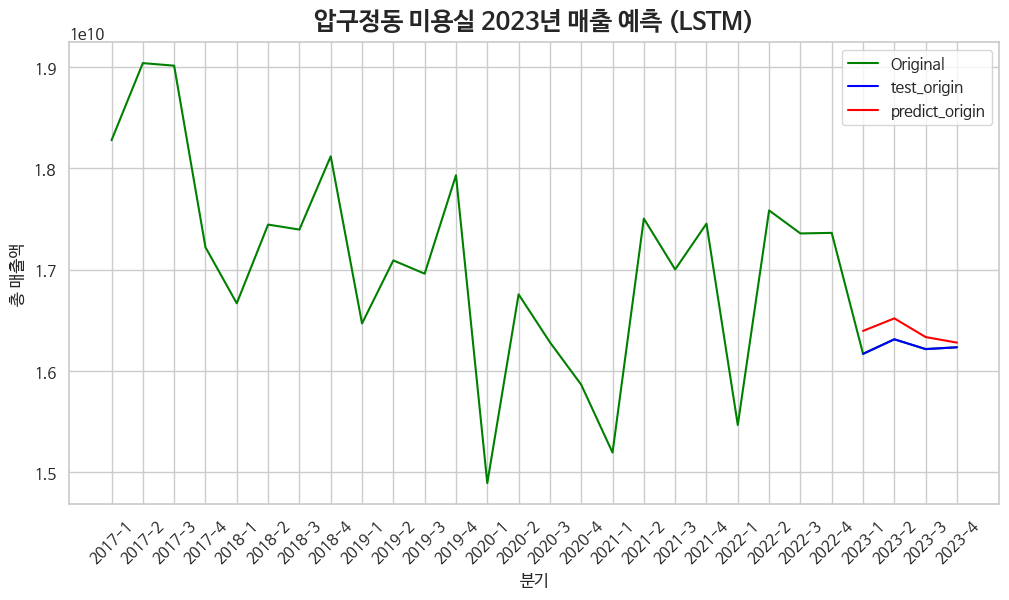

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 미용실 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_hair['분기'], ap_hair['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()